## Exploración de datos

### Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Distribución de los datos](#id3)
4. [Visualización de los datos](#id4)
5. [Conclusión](#id5)

### 1. Descripción de los datos<a name="id1"></a>
Se describen la cantidad de registros y columnas con sus tipos de datos, ocupación en memoria y una estadística descriptiva de los mismos: cúal es el promedio, el desvío estandar, los cuartiles, todos medidas de tendencia central.

In [2]:
# se importan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Se importa el dataset de trabajo
df = pd.read_csv('./dataset/movies_limpio.csv',  delimiter=',')

C:\Users\Area-Desa15\AppData\Local\Temp\ipykernel_24524\1844338907.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/movies_limpio.csv',  delimiter=',')


In [4]:
df.head() # Se observan los primeros registros

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,United States of America,1995.0,12.451801
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995.0,4.043035
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",United States of America,1995.0,0.000000
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,Twentieth Century Fox Film Corporation,United States of America,1995.0,5.090760
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",United States of America,1995.0,0.000000


In [5]:
df.columns # se listan las columnas

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'franquicia',
       'productoras', 'paises', 'release_year', 'retorno'],
      dtype='object')

In [6]:
print('Cantidad de Filas y Columnas',df.shape)

Cantidad de Filas y Columnas (45379, 20)


In [7]:
df.describe(include="all")  # Estadistica descriptiva
# Esto es un resumen del conjunto de datos para todas las columnas numéricas, excepto los valores NaN

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
count,4.537900e+04,45379,45379,45368,44438,45377,45376,4.537900e+04,45130.000000,45376,45296,20398,45376,45376.000000,45376.000000,4488,33096,39160,45376.000000,4.537900e+04
unique,NaN,4068,45349,92,44233,44142,17333,NaN,NaN,1931,6,20269,42196,NaN,NaN,1695,22246,2383,NaN,NaN
top,NaN,"[{'id': 18, 'name': 'Drama'}]",141971,en,No overview found.,1e-06,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,NaN,NaN,The Bowery Boys,Metro-Goldwyn-Mayer (MGM),United States of America,NaN,NaN
freq,NaN,4998,3,32202,133,30,136,NaN,NaN,22380,44936,7,11,NaN,NaN,29,742,17846,NaN,NaN
mean,4.232325e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.122936e+07,94.181675,NaN,NaN,NaN,NaN,5.624070,110.096439,NaN,NaN,NaN,1991.881193,6.599991e+02
std,1.743932e+07,NaN,NaN,NaN,NaN,NaN,NaN,6.438789e+07,38.341059,NaN,NaN,NaN,NaN,1.915423,491.742894,NaN,NaN,NaN,24.055360,7.469083e+04
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1874.000000,0.000000e+00
25%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,1978.000000,0.000000e+00
50%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN,NaN,2001.000000,0.000000e+00
75%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,6.800000,34.000000,NaN,NaN,NaN,2010.000000,0.000000e+00


In [8]:
df.describe() # describe reducido a las columnas numericas

,budget,revenue,runtime,vote_average,vote_count,release_year,retorno
count,4.537900e+04,4.537900e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537900e+04
mean,4.232325e+06,1.122936e+07,94.181675,5.624070,110.096439,1991.881193,6.599991e+02
std,1.743932e+07,6.438789e+07,38.341059,1.915423,491.742894,24.055360,7.469083e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


Con los análisis anteriores se puede observar que las peliculas registras datan de los años 1874 al 2020. Entre ellas hay filmaciones con presupuesto y ganancia en cero. 
También se observa que hay peliculas que no tienen valoración registrada, en cuanto a puntuación por polularidad TMDB (TheMoviesDataBase), reseña y votación.

Se muestra cúales son esos registros:

In [11]:
# Peliculas con budget (presupuesto) cero:
df[df['budget'] == 0.0 ]

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",United States of America,1995.0,0.0
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",United States of America,1995.0,0.0
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,5.4,45.0,NaN,Walt Disney Pictures,United States of America,1995.0,0.0
11,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",12110,en,When a lawyer shows up at the vampire's doorst...,5.430331,1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,5.7,210.0,NaN,"Columbia Pictures, Castle Rock Entertainment, ...","France, United States of America",1995.0,0.0
12,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,en,An outcast half-wolf risks his life to prevent...,12.140733,1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,7.1,423.0,Balto Collection,"Universal Pictures, Amblin Entertainment, Ambl...",United States of America,1995.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45374,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,5.7,26.0,NaN,"Westdeutscher Rundfunk (WDR), Working Title Fi...","Canada, Germany, United Kingdom, United States...",1991.0,0.0
45375,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,NaN,Sine Olivia,Philippines,2011.0,0.0
45376,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,NaN,American World Pictures,United States of America,2003.0,0.0
45377,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,NaN,Yermoliev,Russia,1917.0,0.0


En estos registros se considera error (quizas involuntario) del usuario el presupuesto en 0.0 dado que por ej la pelicula Dracula: Dead and Loving It tuvo un presupuesto: 15 millones USD, 30 millones USD, Robin Hood del año 1991 tuvo un presupuesto de 48 millones USD, etc. 
Estos datos fueron tomados como ejemplos de la web. Lo mismo pasa con los valores del campo revenue: Drácula recaudo 10.772.144 dólares y Robin Hood tuvo una recaudación de  170 millones de dólares

In [12]:
# Peliculas con revenue (recaudación) cero:
df[df['revenue'] == 0.0 ]

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",United States of America,1995.0,0.0
6,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,NaN,"Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",1995.0,0.0
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,5.4,45.0,NaN,Walt Disney Pictures,United States of America,1995.0,0.0
11,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",12110,en,When a lawyer shows up at the vampire's doorst...,5.430331,1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,5.7,210.0,NaN,"Columbia Pictures, Castle Rock Entertainment, ...","France, United States of America",1995.0,0.0
21,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1710,en,An agoraphobic psychologist and a female detec...,10.701801,1995-10-27,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One man is copying the most notorious killers ...,Copycat,6.5,199.0,NaN,"Regency Enterprises, New Regency Pictures",United States of America,1995.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45374,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,5.7,26.0,NaN,"Westdeutscher Rundfunk (WDR), Working Title Fi...","Canada, Germany, United Kingdom, United States...",1991.0,0.0
45375,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,NaN,Sine Olivia,Philippines,2011.0,0.0
45376,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,NaN,American World Pictures,United States of America,2003.0,0.0
45377,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,NaN,Yermoliev,Russia,1917.0,0.0


In [13]:
# Peliculas con duracion (runtime) cero:
df[df['runtime'] == 0.0 ]

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
222,0.0,"[{'id': 53, 'name': 'Thriller'}]",61813,en,Kris is a homicide cop with psychic abilities....,0.155859,1995-01-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dream Man,2.5,1.0,NaN,"Keystone Pictures, Dream Man Productions Inc","United States of America, Canada",1995.0,0.000000
224,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",62488,it,Johnny Destiny burns into Las Vegas in his hot...,0.710671,1995-04-28,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,Destiny Turns on the Radio,5.3,9.0,NaN,"Savoy Pictures, Rysher Entertainment",United States of America,1995.0,0.000000
398,0.0,[],172923,en,Greed and playing into the hand of providence ...,0.233376,1995-05-26,0.0,0.0,[],Released,NaN,Dos Crímenes,5.0,1.0,NaN,NaN,NaN,1995.0,0.000000
554,0.0,[],218473,en,"The Beans are poor, proud, hated by all, but a...",0.38247,1994-01-01,0.0,0.0,[],Released,NaN,"The Beans of Egypt, Maine",0.0,1.0,NaN,NaN,NaN,1994.0,0.000000
667,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",221917,en,An Irish lad (Matt Keeslar) who fled from his ...,0.117662,1995-09-22,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An unforgettable romance,The Run of the Country,8.0,2.0,NaN,"Castle Rock Entertainment, Columbia Pictures C...","Ireland, United States of America",1995.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,0.0,"[{'id': 18, 'name': 'Drama'}]",374764,es,Celina works at a remote tollbooth on a desert...,0.274793,2015-11-12,0.0,0.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,How Most Things Work,6.8,2.0,NaN,Tarea Fina,Argentina,2015.0,0.000000
45286,0.0,"[{'id': 16, 'name': 'Animation'}]",460135,en,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,2017-08-30,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,LEGO DC Super Hero Girls: Brain Drain,10.0,2.0,DC Super Hero Girls Collection,Warner Bros. Animation,United States of America,2017.0,0.000000
45314,750000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,ru,NaN,0.201582,2014-06-05,3.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,All at Once,6.0,4.0,NaN,"Кинокомпания «Lunapark», Инвада фильм",Russia,2014.0,0.000004
45330,0.0,"[{'id': 35, 'name': 'Comedy'}]",282308,en,After visiting the first Cubist exposition in ...,0.003732,1912-01-01,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,"Whiffles, Cubic Artist",0.0,0.0,NaN,Pathé Frères,France,1912.0,0.000000


Las peliculas con runtime cero es incorrecto, todas la speliculas deben tener una duracion, por lo cual se considera un dato mal cargado u omitido por el usuario.

In [17]:
# Peliculas con puntaje promedio de reseña en cero:
df[df['vote_average'] == 0.0]

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
83,0.0,[],188588,en,"Filmed entirely on location in East Hampton, L...",0.531159,1995-11-22,0.0,108.0,[],Released,NaN,Last Summer in the Hamptons,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
107,0.0,"[{'id': 80, 'name': 'Crime'}]",96357,en,An ex-con holds a group of people hostage in a...,0.001346,1995-05-20,0.0,110.0,[],Released,NaN,Headless Body in Topless Bar,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
126,0.0,[],290157,en,"Michel Negroponte, a documentary filmmaker, me...",0.001178,1995-01-01,0.0,87.0,[],Released,A Haunting Real Life Mystery,Jupiter's Wife,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
132,0.0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",124636,en,Within days after the release of Negativland's...,0.001838,1995-08-01,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Sonic Outlaws,0.0,0.0,NaN,NaN,United States of America,1995.0,0.0
137,0.0,[],124639,en,A subtle yet violent commentary on feudal lords.,0.001205,1995-08-01,0.0,122.0,[],Released,NaN,Target,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45346,0.0,"[{'id': 99, 'name': 'Documentary'}]",323132,en,This film records a 12 day ritual performed by...,0.0,1976-01-01,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Altar of Fire,0.0,0.0,NaN,NaN,NaN,1976.0,0.0
45348,0.0,[],325439,en,Young Aladdin (Donald O'Connor) has a series o...,0.093498,1961-10-31,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Wonders of Aladdin,0.0,0.0,NaN,NaN,NaN,1961.0,0.0
45366,0.0,"[{'id': 99, 'name': 'Documentary'}]",276895,en,"Deep Hearts is a film about the Bororo Fulani,...",0.011025,1981-01-01,0.0,58.0,"[{'iso_639_1': 'ff', 'name': 'Fulfulde'}, {'is...",Released,NaN,Deep Hearts,0.0,0.0,NaN,NaN,United States of America,1981.0,0.0
45377,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,NaN,Yermoliev,Russia,1917.0,0.0


In [18]:
# Peliculas con votos en cero:
df[df['vote_count'] == 0.0]

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,release_year,retorno
83,0.0,[],188588,en,"Filmed entirely on location in East Hampton, L...",0.531159,1995-11-22,0.0,108.0,[],Released,NaN,Last Summer in the Hamptons,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
107,0.0,"[{'id': 80, 'name': 'Crime'}]",96357,en,An ex-con holds a group of people hostage in a...,0.001346,1995-05-20,0.0,110.0,[],Released,NaN,Headless Body in Topless Bar,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
126,0.0,[],290157,en,"Michel Negroponte, a documentary filmmaker, me...",0.001178,1995-01-01,0.0,87.0,[],Released,A Haunting Real Life Mystery,Jupiter's Wife,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
132,0.0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",124636,en,Within days after the release of Negativland's...,0.001838,1995-08-01,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Sonic Outlaws,0.0,0.0,NaN,NaN,United States of America,1995.0,0.0
137,0.0,[],124639,en,A subtle yet violent commentary on feudal lords.,0.001205,1995-08-01,0.0,122.0,[],Released,NaN,Target,0.0,0.0,NaN,NaN,NaN,1995.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45346,0.0,"[{'id': 99, 'name': 'Documentary'}]",323132,en,This film records a 12 day ritual performed by...,0.0,1976-01-01,0.0,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Altar of Fire,0.0,0.0,NaN,NaN,NaN,1976.0,0.0
45348,0.0,[],325439,en,Young Aladdin (Donald O'Connor) has a series o...,0.093498,1961-10-31,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Wonders of Aladdin,0.0,0.0,NaN,NaN,NaN,1961.0,0.0
45366,0.0,"[{'id': 99, 'name': 'Documentary'}]",276895,en,"Deep Hearts is a film about the Bororo Fulani,...",0.011025,1981-01-01,0.0,58.0,"[{'iso_639_1': 'ff', 'name': 'Fulfulde'}, {'is...",Released,NaN,Deep Hearts,0.0,0.0,NaN,NaN,United States of America,1981.0,0.0
45377,0.0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,NaN,Yermoliev,Russia,1917.0,0.0


Para el caso de las peliculas puede que no tengan una buena puntuación o valoración registrada. Pero debería haber aunque sea una valoración negativa, sin embargo no se considera un error de usuario como con los campos presupuesto, lo recaudado y la duración de una película.

In [9]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45379 non-null  float64
 1   genres             45379 non-null  object 
 2   id                 45379 non-null  object 
 3   original_language  45368 non-null  object 
 4   overview           44438 non-null  object 
 5   popularity         45377 non-null  object 
 6   release_date       45376 non-null  object 
 7   revenue            45379 non-null  float64
 8   runtime            45130 non-null  float64
 9   spoken_languages   45376 non-null  object 
 10  status             45296 non-null  object 
 11  tagline            20398 non-null  object 
 12  title              45376 non-null  object 
 13  vote_average       45376 non-null  float64
 14  vote_count         45376 non-null  float64
 15  franquicia         4488 non-null   object 
 16  productoras        330

In [10]:
df.isnull().sum() # se enlista los nulos por columna, pero no se los imputa.

budget                   0
genres                   0
id                       0
original_language       11
overview               941
popularity               2
release_date             3
revenue                  0
runtime                249
spoken_languages         3
status                  83
tagline              24981
title                    3
vote_average             3
vote_count               3
franquicia           40891
productoras          12283
paises                6219
release_year             3
retorno                  0
dtype: int64

In [12]:
# se analiza si hay duplicados:
df.duplicated().sum()

13

In [14]:
print(df[df.duplicated(keep=False)]) # se visualizan los registros duplicados

         budget                                             genres      id  \
676         0.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...  105045   
1463        0.0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...  105045   
7340        0.0  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...    5511   
8063        0.0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   23305   
9160        0.0  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...    5511   
9322        0.0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   23305   
13256       0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...  141971   
13370       0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...  141971   
13598       0.0  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...  168538   
13994       0.0  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   18440   
14006       0.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   11115   
15695       0.0  [{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n.

In [16]:
df = df.drop_duplicates()
print('Cantidad de registros sin duplicados',df.shape[0])

Cantidad de registros sin duplicados 45366


### 2. Ortliers<a name="id2"></a>
Detección de valores atípicos de los campos numericos a excepción del año de estreno de la pelicula dados valores normales entre el minimo y el maximo (1874 - 2020)

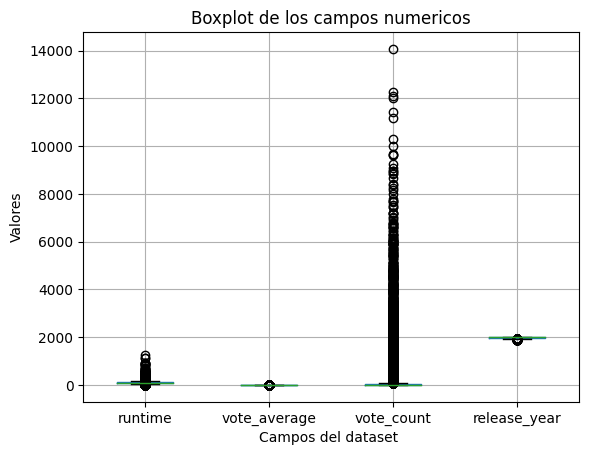

In [26]:

columnas = ['budget','revenue','runtime','vote_average','vote_count']

df[columnas].boxplot()

plt.xlabel('Campos del dataset ')
plt.ylabel('Valores')
plt.title('Boxplot de los campos numericos')

plt.show()

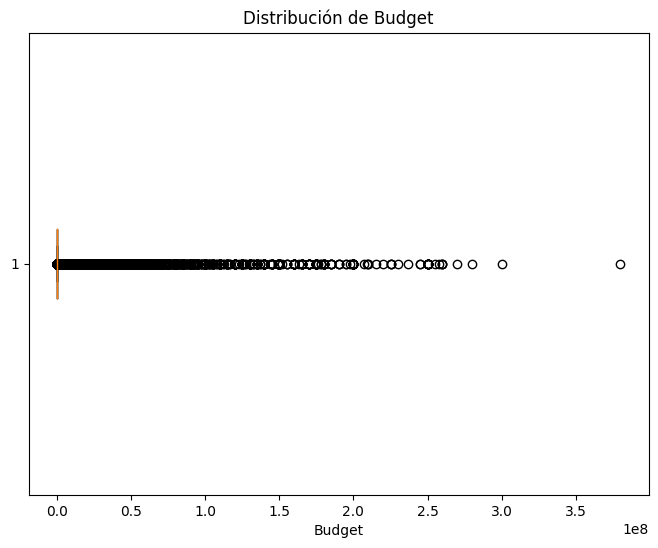

In [21]:


# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
plt.boxplot(df['budget'], vert=False)  # vert=False para un gráfico horizontal
plt.title('Distribución de Budget')
plt.xlabel('Budget')
plt.show()
